In [2]:
from astropy.wcs import WCS
from astropy import units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
from astromodule.io import read_table
from astropy.visualization.wcsaxes import SphericalCircle
from astropy.coordinates.name_resolve import get_icrs_coordinates

In [5]:
get_icrs_coordinates('NGC 1437B')

<SkyCoord (ICRS): (ra, dec) in deg
    (56.4786, -36.356925)>

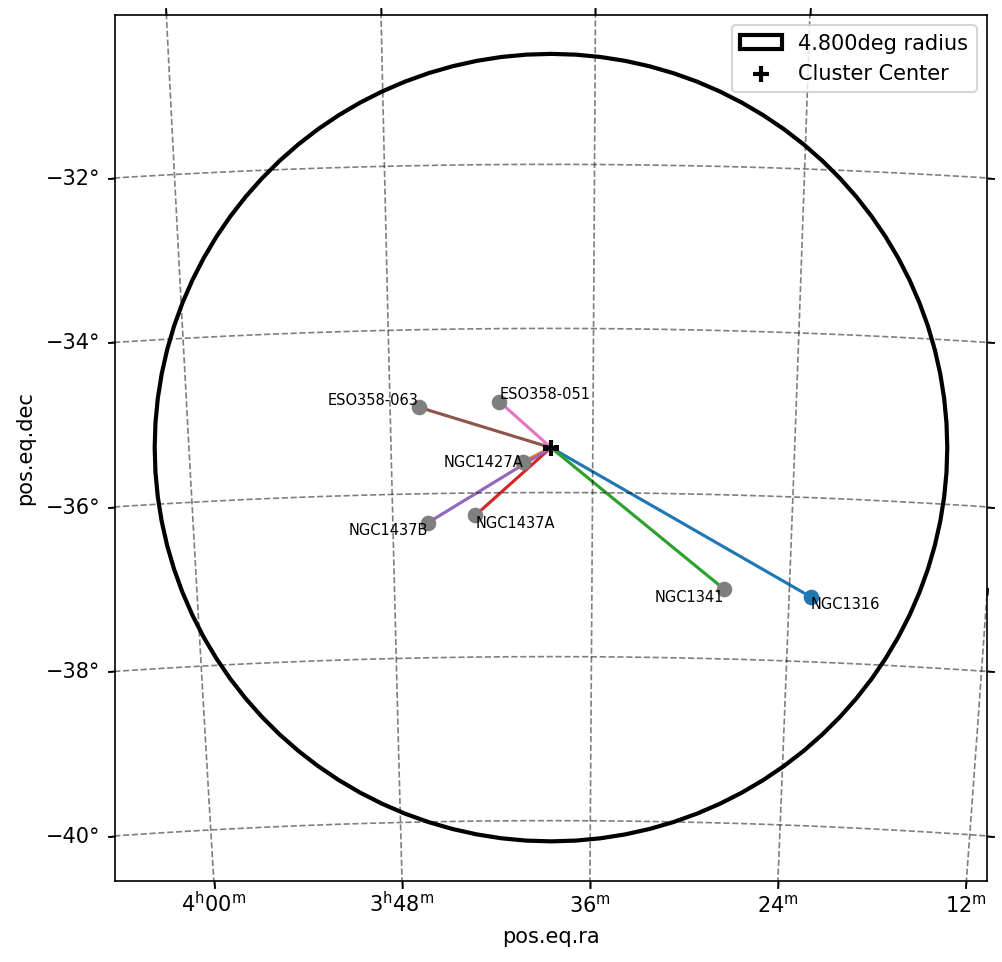

In [5]:
df = read_table('clusters.csv', comment='#')

center = SkyCoord(ra=df.ra[0], dec=df.dec[0], unit=u.deg)
radius = 3*1.6

wcs_spec =  {
  # 'CDELT1': -1.0,
  # 'CDELT2': 1.0,
  # 'CRPIX1': 8.5,
  # 'CRPIX2': 8.5,
  'CRVAL1': center.ra.deg,
  'CRVAL2': center.dec.deg,
  'CTYPE1': 'RA---AIT',
  'CTYPE2': 'DEC--AIT',
  'CUNIT1': 'deg',
  'CUNIT2': 'deg'
}
wcs = WCS(wcs_spec)
fig = plt.figure(figsize=(7.5, 7.5), dpi=150)
ax = fig.add_subplot(projection=wcs)

circle = SphericalCircle(
  center=[center.ra, center.dec],
  radius=radius*u.deg,
  fc='none', 
  lw=2, 
  linestyle='-',
  ec='k', 
  transform=ax.get_transform('icrs'), 
  label=f'{radius:.3f}deg radius',
)
ax.add_patch(circle)

ax.scatter(
  center.ra.deg, 
  center.dec.deg, 
  marker='+', 
  linewidths=2, 
  s=60, 
  c='k', 
  rasterized=True, 
  transform=ax.get_transform('icrs'),
  label='Cluster Center'
)

for i in range(1, len(df)):
  x = [df.ra[i], center.ra.deg]
  y = [df.dec[i], center.dec.deg]
  ax.plot(x, y, zorder=0, transform=ax.get_transform('icrs'))
  ax.text(
    df.ra[i],
    df.dec[i],
    df.name[i],
    ha=df.ha[i],
    va=df.va[i],
    size=7,
    transform=ax.get_transform('icrs'),
  )
  
ax.scatter(
  df.ra[1],
  df.dec[1],
  linewidths=2, 
  s=30, 
  c='tab:blue', 
  rasterized=True, 
  transform=ax.get_transform('icrs'),
)

ax.scatter(
  df.ra[2:],
  df.dec[2:],
  linewidths=2, 
  s=30, 
  c='tab:gray', 
  rasterized=True, 
  transform=ax.get_transform('icrs'),
)


ax.grid('on', color='k', linestyle='--', alpha=.5)
ax.invert_xaxis()
ax.legend()